Part 1- Logistic regression model:
build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics

In [26]:
data = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')
display(data.head())
display(data.describe())
display(data.info())
display(data.isnull().sum())


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


None

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [27]:
#feature selection
#split dataset in features and target variable
x = data[['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25']]
y = data['cvd_4types']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
# Using gridsearchcv to optimized the model and find best hyperparameter

#turned off the warnings as the GridSearchCV() function tends to generate quite a bit of warnings.
warnings.filterwarnings('ignore') 

parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-10, 10, 10),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
#call the GridSearchCV() function using the algorithm that already are using, together with the various arguments
logreg = LogisticRegression()
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
#The GridSearchCV() function returns a LogisticRegression instance
clf.fit(X_train,Y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.689288916611438


In [29]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)

Part 2: Display the Feature Importance of all the features sorted in the order of decreasing influence on
the CVD Risk (deliverable: Notebook)

In [30]:
m = LogisticRegression()
m.fit(x_train, y_train)
m.fit(x_train / np.std(x_train,0),y_train)
sorted(m.coef_, reverse=True)
print(m.coef_)

[[ 0.02218845 -0.34665948  0.19715455 -0.15778982 -0.67949109 -0.25430886
   1.23359523 -0.23416667 -0.02405074 -0.0408073   0.11604434  0.1620689
   0.10165735 -0.01754872  0.13279036 -0.3720261 ]]


Part 3: Evaluate the performance of your model (including ROC Curve), explain the performance and
draw a meaningful conclusion. (deliverable: Performance outputs in Notebook, explanation and
conclusion in Word/PDF document)

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[181, 207],
       [116, 469]])

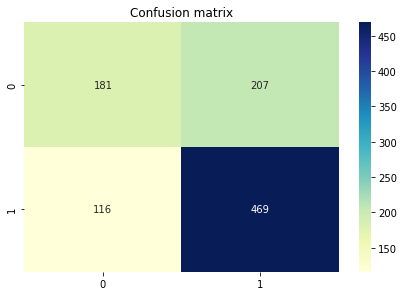

In [32]:
#heat map
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53       388
           1       0.69      0.80      0.74       585

    accuracy                           0.67       973
   macro avg       0.65      0.63      0.64       973
weighted avg       0.66      0.67      0.66       973



In [34]:
#accuracy
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.6680369989722508

In [35]:
#precision
pre = metrics.precision_score(y_test, y_pred)
pre

0.6937869822485208

In [36]:
#recall
rec = metrics.recall_score(y_test, y_pred)
rec

0.8017094017094017

In [37]:
#calculate ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

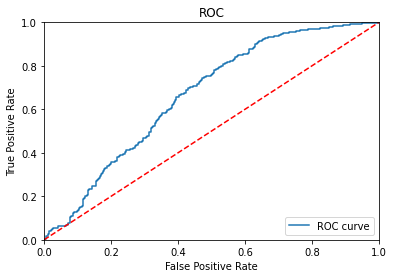

In [38]:
#ROC curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.title('ROC')
plt.plot(fpr, tpr, label = 'ROC curve')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [39]:
#AUC
auc

0.6651202749140894